In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv(Path("datasets/housing/housing.csv"))

## 数据探索和可视化

### 可视化GEO数据

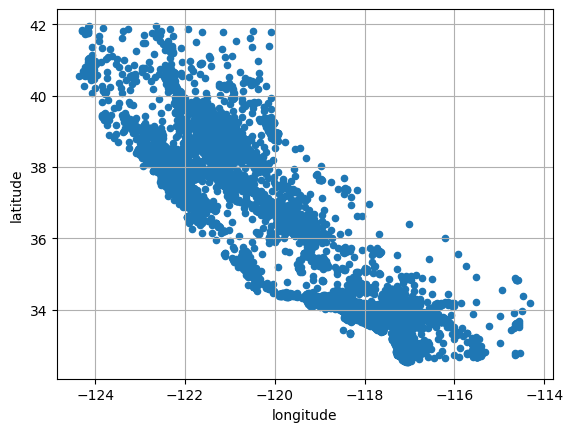

In [5]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

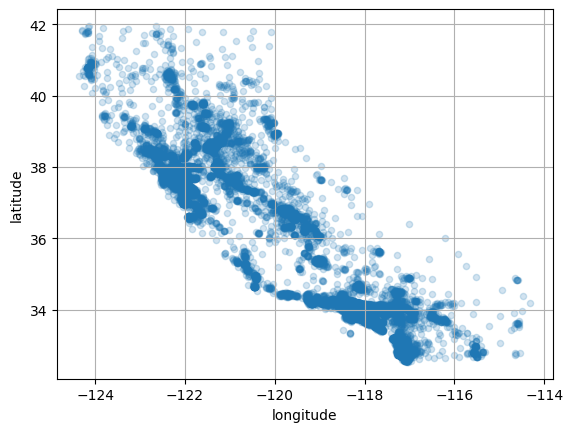

In [6]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

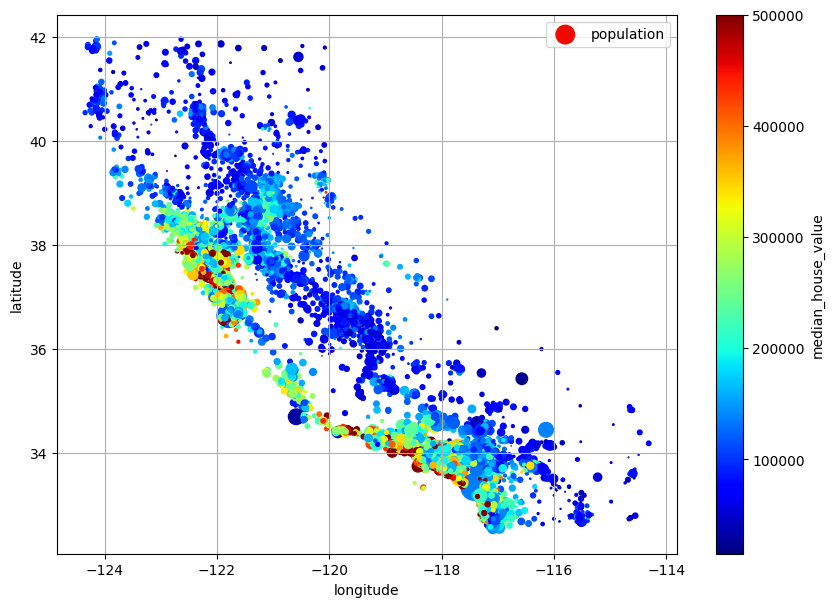

In [7]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

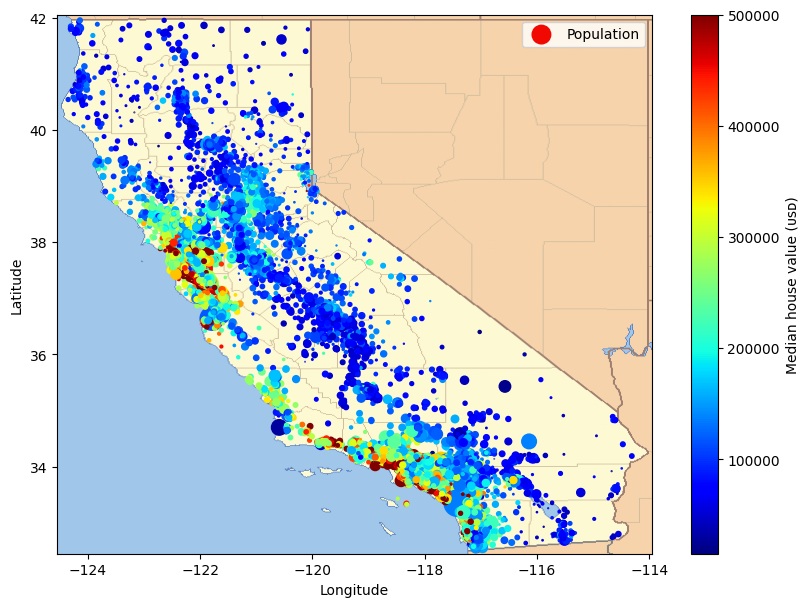

In [9]:
# Download the California image
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()

### 寻找数据相关性

In [24]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
2875,-122.08,37.63,34.0,1619.0,293.0,1148.0,310.0,4.0326,164700.0,NEAR BAY,3
15098,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383,166200.0,<1H OCEAN,3
11562,-122.40,37.78,32.0,352.0,132.0,313.0,105.0,2.5742,350000.0,NEAR BAY,2
14648,-122.37,37.95,35.0,215.0,45.0,100.0,34.0,1.6023,81300.0,NEAR BAY,2
1148,-122.17,37.74,43.0,818.0,193.0,494.0,179.0,2.4776,101600.0,NEAR BAY,2
...,...,...,...,...,...,...,...,...,...,...,...
15855,-119.67,36.72,31.0,843.0,140.0,453.0,149.0,2.6875,153800.0,INLAND,2
9417,-119.86,36.80,18.0,2536.0,516.0,1196.0,466.0,2.5595,67900.0,INLAND,2
13297,-117.34,33.19,23.0,3546.0,553.0,1533.0,518.0,5.2760,224500.0,NEAR OCEAN,4
8808,-117.60,34.08,15.0,2700.0,460.0,1432.0,449.0,4.9063,159800.0,INLAND,4


In [25]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
    set_.drop("ocean_proximity", axis=1, inplace=True)
housing = strat_train_set.copy()

In [26]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2875,-122.08,37.63,34.0,1619.0,293.0,1148.0,310.0,4.0326,164700.0
15098,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383,166200.0
11562,-122.40,37.78,32.0,352.0,132.0,313.0,105.0,2.5742,350000.0
14648,-122.37,37.95,35.0,215.0,45.0,100.0,34.0,1.6023,81300.0
1148,-122.17,37.74,43.0,818.0,193.0,494.0,179.0,2.4776,101600.0
...,...,...,...,...,...,...,...,...,...
15855,-119.67,36.72,31.0,843.0,140.0,453.0,149.0,2.6875,153800.0
9417,-119.86,36.80,18.0,2536.0,516.0,1196.0,466.0,2.5595,67900.0
13297,-117.34,33.19,23.0,3546.0,553.0,1533.0,518.0,5.2760,224500.0
8808,-117.60,34.08,15.0,2700.0,460.0,1432.0,449.0,4.9063,159800.0


In [27]:
corr_matrix = housing.corr()

In [28]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687823
total_rooms           0.132726
housing_median_age    0.102761
households            0.068516
total_bedrooms        0.051699
population           -0.023537
longitude            -0.053639
latitude             -0.138313
Name: median_house_value, dtype: float64

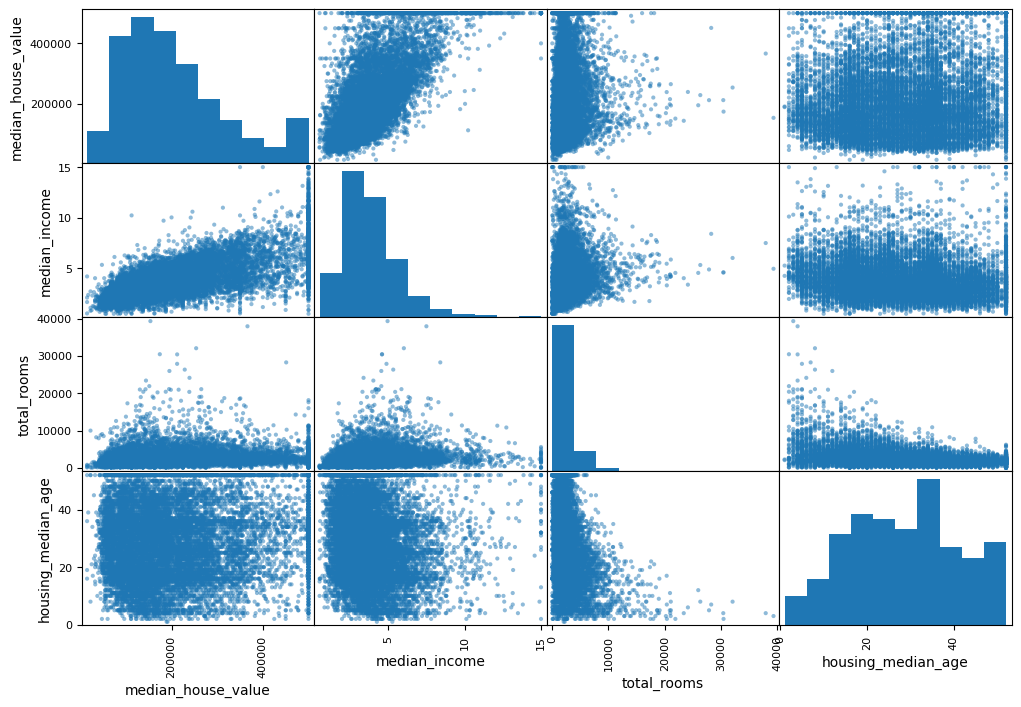

In [29]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

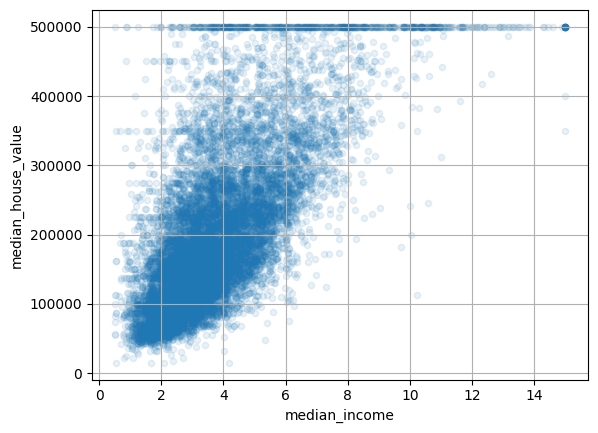

In [30]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

### 尝试组合新特征

In [31]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [32]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687823
rooms_per_house       0.143607
total_rooms           0.132726
housing_median_age    0.102761
households            0.068516
total_bedrooms        0.051699
population           -0.023537
people_per_house     -0.033193
longitude            -0.053639
latitude             -0.138313
bedrooms_ratio       -0.255405
Name: median_house_value, dtype: float64